<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_13/GNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# prompt: 남성과 여성으로 분류되는 가상의 데이터 100개를 생성해주라. 특성은 키, 몸무게이다.

import pandas as pd
import numpy as np

# 가상 데이터 생성
np.random.seed(42) # 재현성을 위해 seed 설정
data = {
    'height': np.random.normal(loc=170, scale=10, size=100), # 평균 170, 표준편차 10인 정규분포
    'weight': np.random.normal(loc=65, scale=8, size=100),   # 평균 65, 표준편차 8인 정규분포
    'gender': np.random.choice(['Male', 'Female'], size=100, p=[0.5, 0.5]) # 남성/여성 50:50 비율
}

df = pd.DataFrame(data)

# 성별에 따라 키와 몸무게 분포를 약간 다르게 설정 (선택 사항)
# 예를 들어, 남성의 키를 평균적으로 더 크게, 여성의 몸무게를 평균적으로 더 작게 설정
df['height'] = df.apply(lambda row: row['height'] + 10 if row['gender'] == 'Male' else row['height'] - 5, axis=1)
df['weight'] = df.apply(lambda row: row['weight'] + 6 if row['gender'] == 'Male' else row['weight'] - 3, axis=1)

print(df.head())
print(df.info())


       height     weight  gender
0  169.967142  50.677034  Female
1  163.617357  58.634837  Female
2  171.476885  59.258284  Female
3  180.230299  55.581782  Female
4  177.658466  69.709714    Male
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  100 non-null    float64
 1   weight  100 non-null    float64
 2   gender  100 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.5+ KB
None


In [9]:
# prompt: 남성과 여성의 사전확률을 구해다오

# Calculate the prior probabilities of Male and Female
prior_male = df['gender'].value_counts(normalize=True)['Male']
prior_female = df['gender'].value_counts(normalize=True)['Female']

print(f"사전확률 (남성): {prior_male:.4f}")
print(f"사전확률 (여성): {prior_female:.4f}")

사전확률 (남성): 0.4600
사전확률 (여성): 0.5400


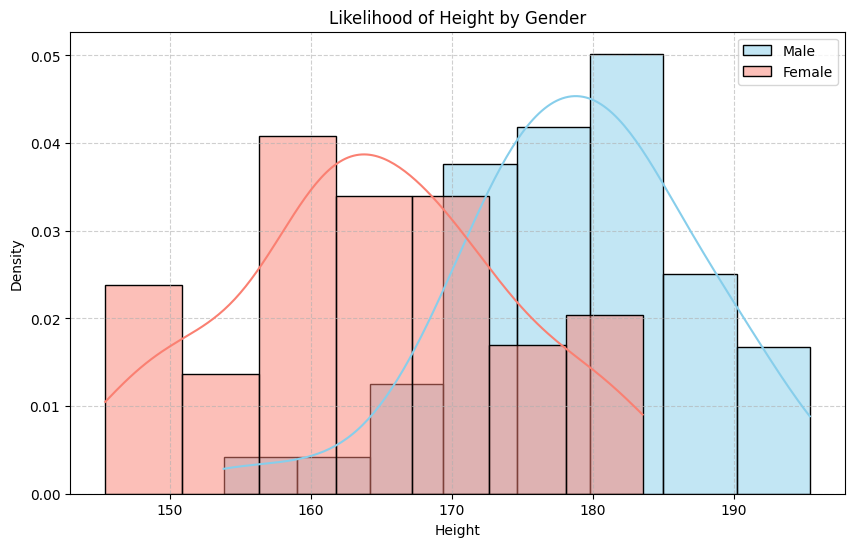

In [10]:
# prompt: "키" 특성을 기준으로 남성과 여성일 경우 각각의 likelihood를 시각화해줘. 그림의 텍스트는영어로 해주라

import matplotlib.pyplot as plt
import seaborn as sns

# Separate data by gender
df_male = df[df['gender'] == 'Male']
df_female = df[df['gender'] == 'Female']

# Plot the likelihood of 'height' for each gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df_male, x='height', kde=True, stat='density', color='skyblue', label='Male')
sns.histplot(data=df_female, x='height', kde=True, stat='density', color='salmon', label='Female')
plt.title('Likelihood of Height by Gender')
plt.xlabel('Height')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [13]:
# prompt: 168인 사람은 남자인가 여자인가? 산술식을 프린트해주고

import numpy as np
# Assume a height of 168 cm
height = 168

# Calculate the mean and standard deviation of height for each gender from the generated data
# We will use these as estimates for the distributions
mean_height_male = df_male['height'].mean()
std_height_male = df_male['height'].std()
mean_height_female = df_female['height'].mean()
std_height_female = df_female['height'].std()

print(f"남성 평균 키: {mean_height_male:.2f}, 남성 키 표준편차: {std_height_male:.2f}")
print(f"여성 평균 키: {mean_height_female:.2f}, 여성 키 표준편차: {std_height_female:.2f}")


# Define a function to calculate the probability density function (PDF) for a normal distribution
def normal_pdf(x, mean, std):
    exponent = -((x - mean) ** 2) / (2 * (std ** 2))
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(exponent)

# Calculate the likelihood of observing a height of 168 for each gender
# This is P(Height=168 | Gender)
likelihood_male = normal_pdf(height, mean_height_male, std_height_male)
likelihood_female = normal_pdf(height, mean_height_female, std_height_female)

print(f"P(키=168 | 남성): {likelihood_male:.4f}")
print(f"P(키=168 | 여성): {likelihood_female:.4f}")


# Calculate the posterior probability using Bayes' theorem
# P(Gender | Height=168) = [P(Height=168 | Gender) * P(Gender)] / P(Height=168)
# The denominator P(Height=168) is P(Height=168 | Male) * P(Male) + P(Height=168 | Female) * P(Female)

# Calculate the evidence (denominator)
evidence = (likelihood_male * prior_male) + (likelihood_female * prior_female)

# Calculate the posterior probabilities
posterior_male = (likelihood_male * prior_male) / evidence
posterior_female = (likelihood_female * prior_female) / evidence

print(f"\n베이즈 정리 적용 산술식:")
print(f"P(남성 | 키=168) = [P(키=168 | 남성) * P(남성)] / P(키=168)")
print(f"P(여성 | 키=168) = [P(키=168 | 여성) * P(여성)] / P(키=168)")
print(f"여기서 P(키=168) = P(키=168 | 남성) * P(남성) + P(키=168 | 여성) * P(여성)")

print(f"\n계산 결과:")
print(f"P(남성 | 키=168) = ({likelihood_male:.4f} * {prior_male:.4f}) / {evidence:.4f} = {posterior_male:.4f}")
print(f"P(여성 | 키=168) = ({likelihood_female:.4f} * {prior_female:.4f}) / {evidence:.4f} = {posterior_female:.4f}")


# Determine the most likely gender based on the posterior probabilities
if posterior_male > posterior_female:
    predicted_gender = "남성"
else:
    predicted_gender = "여성"

print(f"\n키가 168cm인 사람은 데이터 분포 및 베이즈 정리에 따르면 {predicted_gender}일 가능성이 높습니다.")

남성 평균 키: 178.77, 남성 키 표준편차: 8.43
여성 평균 키: 164.12, 여성 키 표준편차: 9.68
P(키=168 | 남성): 0.0209
P(키=168 | 여성): 0.0380

베이즈 정리 적용 산술식:
P(남성 | 키=168) = [P(키=168 | 남성) * P(남성)] / P(키=168)
P(여성 | 키=168) = [P(키=168 | 여성) * P(여성)] / P(키=168)
여기서 P(키=168) = P(키=168 | 남성) * P(남성) + P(키=168 | 여성) * P(여성)

계산 결과:
P(남성 | 키=168) = (0.0209 * 0.4600) / 0.0302 = 0.3190
P(여성 | 키=168) = (0.0380 * 0.5400) / 0.0302 = 0.6810

키가 168cm인 사람은 데이터 분포 및 베이즈 정리에 따르면 여성일 가능성이 높습니다.


<ipython-input-11-941e96ddcdfd>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


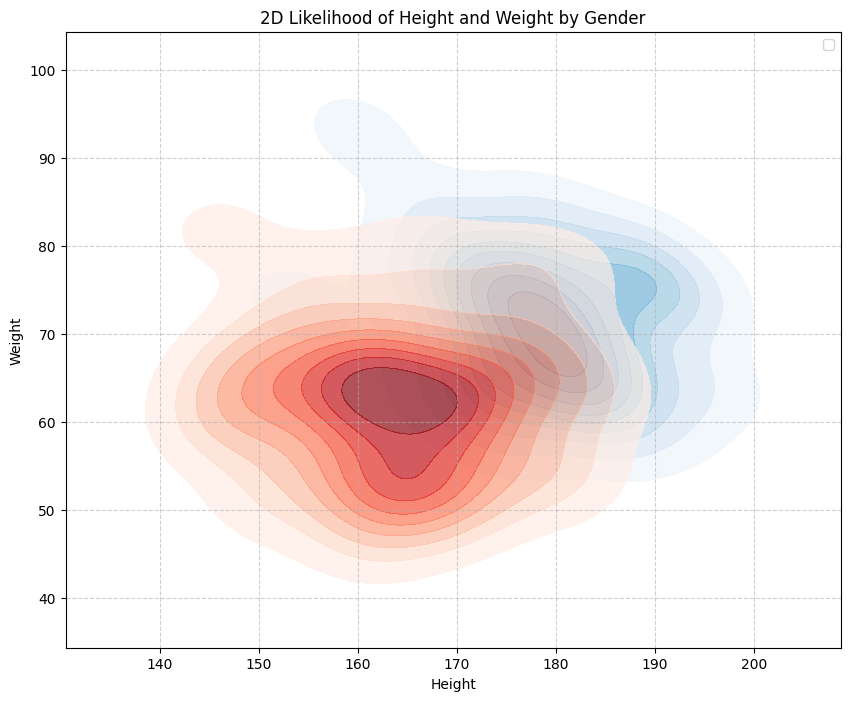

In [11]:
# prompt: "키"와 "몸무게"를 특성을 기준으로 남성과 여성일 경우 각각의 likelihood를 2차원 시각화해줘. 그림의 텍스트는 영어로 해주라

import matplotlib.pyplot as plt

# Create a 2D visualization of likelihood based on 'height' and 'weight'
# Using Kernel Density Estimation for a smooth representation
plt.figure(figsize=(10, 8))

# Plot for Male
sns.kdeplot(data=df_male, x='height', y='weight', fill=True, cmap='Blues', alpha=0.7, label='Male Likelihood')
# Plot for Female
sns.kdeplot(data=df_female, x='height', y='weight', fill=True, cmap='Reds', alpha=0.7, label='Female Likelihood')

plt.title('2D Likelihood of Height and Weight by Gender')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


남성 평균 몸무게: 71.21, 남성 몸무게 표준편차: 7.32
여성 평균 몸무게: 62.15, 여성 몸무게 표준편차: 7.95
P(몸무게=78 | 남성): 0.0355
P(몸무게=78 | 여성): 0.0069

P(키=168, 몸무게=78 | 남성) (독립 가정): 0.0007
P(키=168, 몸무게=78 | 여성) (독립 가정): 0.0003
P(키=168, 몸무게=78): 0.0005

베이즈 정리 적용 산술식 (키와 몸무게 모두 고려):
P(남성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 남성) * P(남성)] / P(키=168, 몸무게=78)
P(여성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 여성) * P(여성)] / P(키=168, 몸무게=78)
여기서 P(키=168, 몸무게=78) = P(키=168, 몸무게=78 | 남성) * P(남성) + P(키=168, 몸무게=78 | 여성) * P(여성)

계산 결과 (키=168, 몸무게=78):
P(남성 | 키=168, 몸무게=78) = (0.0007 * 0.4600) / 0.0005 = 0.7071
P(여성 | 키=168, 몸무게=78) = (0.0003 * 0.5400) / 0.0005 = 0.2929

키가 168cm, 몸무게가 78kg인 사람은 데이터 분포 및 베이즈 정리에 따르면 남성일 가능성이 높습니다.


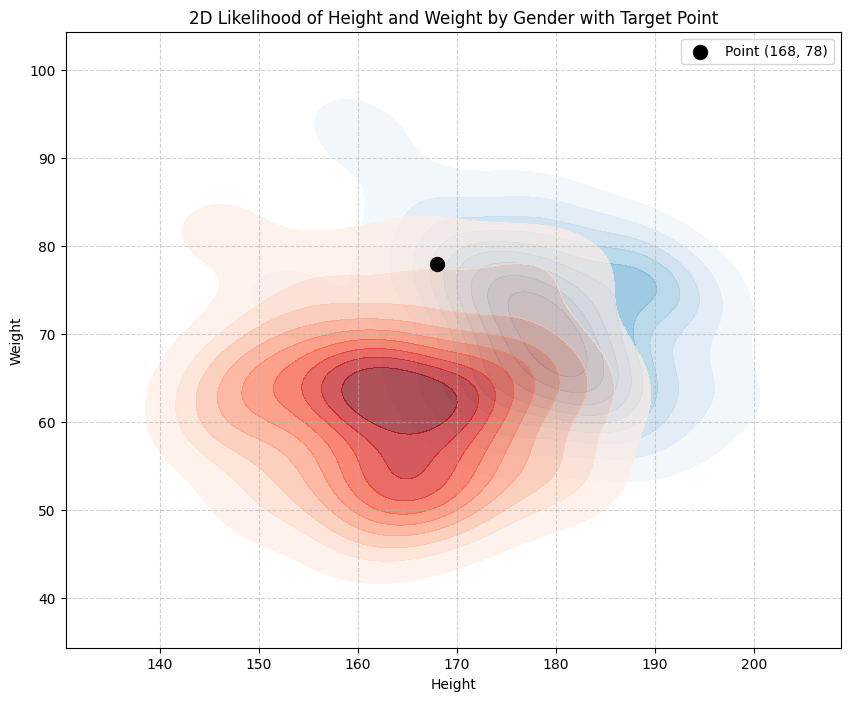

In [14]:
# prompt: "키"가 168이고 몸무게가 "78" 인 경우는 남자인가 여자인가? 산술식으로 표시해 주라

import matplotlib.pyplot as plt
# Given values
height = 168
weight = 78

# Calculate the mean and standard deviation of weight for each gender from the generated data
mean_weight_male = df_male['weight'].mean()
std_weight_male = df_male['weight'].std()
mean_weight_female = df_female['weight'].mean()
std_weight_female = df_female['weight'].std()

print(f"\n남성 평균 몸무게: {mean_weight_male:.2f}, 남성 몸무게 표준편차: {std_weight_male:.2f}")
print(f"여성 평균 몸무게: {mean_weight_female:.2f}, 여성 몸무게 표준편차: {std_weight_female:.2f}")

# Calculate the likelihood of observing a weight of 78 for each gender
# This is P(Weight=78 | Gender)
likelihood_weight_male = normal_pdf(weight, mean_weight_male, std_weight_male)
likelihood_weight_female = normal_pdf(weight, mean_weight_female, std_weight_female)

print(f"P(몸무게=78 | 남성): {likelihood_weight_male:.4f}")
print(f"P(몸무게=78 | 여성): {likelihood_weight_female:.4f}")

# Assuming independence between height and weight given the gender (Naive Bayes assumption)
# P(Height=168, Weight=78 | Gender) = P(Height=168 | Gender) * P(Weight=78 | Gender)

likelihood_combined_male = likelihood_male * likelihood_weight_male
likelihood_combined_female = likelihood_female * likelihood_weight_female

print(f"\nP(키=168, 몸무게=78 | 남성) (독립 가정): {likelihood_combined_male:.4f}")
print(f"P(키=168, 몸무게=78 | 여성) (독립 가정): {likelihood_combined_female:.4f}")

# Calculate the evidence (denominator) for the combined likelihood
# P(Height=168, Weight=78) = P(Height=168, Weight=78 | Male) * P(Male) + P(Height=168, Weight=78 | Female) * P(Female)
evidence_combined = (likelihood_combined_male * prior_male) + (likelihood_combined_female * prior_female)

print(f"P(키=168, 몸무게=78): {evidence_combined:.4f}")


# Calculate the posterior probabilities using Bayes' theorem with combined likelihood
# P(Gender | Height=168, Weight=78) = [P(Height=168, Weight=78 | Gender) * P(Gender)] / P(Height=168, Weight=78)

posterior_combined_male = (likelihood_combined_male * prior_male) / evidence_combined
posterior_combined_female = (likelihood_combined_female * prior_female) / evidence_combined

print(f"\n베이즈 정리 적용 산술식 (키와 몸무게 모두 고려):")
print(f"P(남성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 남성) * P(남성)] / P(키=168, 몸무게=78)")
print(f"P(여성 | 키=168, 몸무게=78) = [P(키=168, 몸무게=78 | 여성) * P(여성)] / P(키=168, 몸무게=78)")
print(f"여기서 P(키=168, 몸무게=78) = P(키=168, 몸무게=78 | 남성) * P(남성) + P(키=168, 몸무게=78 | 여성) * P(여성)")

print(f"\n계산 결과 (키=168, 몸무게=78):")
print(f"P(남성 | 키=168, 몸무게=78) = ({likelihood_combined_male:.4f} * {prior_male:.4f}) / {evidence_combined:.4f} = {posterior_combined_male:.4f}")
print(f"P(여성 | 키=168, 몸무게=78) = ({likelihood_combined_female:.4f} * {prior_female:.4f}) / {evidence_combined:.4f} = {posterior_combined_female:.4f}")

# Determine the most likely gender based on the combined posterior probabilities
if posterior_combined_male > posterior_combined_female:
    predicted_gender_combined = "남성"
else:
    predicted_gender_combined = "여성"

print(f"\n키가 168cm, 몸무게가 78kg인 사람은 데이터 분포 및 베이즈 정리에 따르면 {predicted_gender_combined}일 가능성이 높습니다.")

# Add the point (168, 78) to the 2D plot
plt.figure(figsize=(10, 8))

sns.kdeplot(data=df_male, x='height', y='weight', fill=True, cmap='Blues', alpha=0.7, label='Male Likelihood')
sns.kdeplot(data=df_female, x='height', y='weight', fill=True, cmap='Reds', alpha=0.7, label='Female Likelihood')

plt.scatter(height, weight, color='black', s=100, zorder=5, label=f'Point ({height}, {weight})')

plt.title('2D Likelihood of Height and Weight by Gender with Target Point')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# prompt: 나이브베이지안에 대해 마크다운 형테로 산술식과 같이 설명해다오

## 나이브 베이즈 분류 (Naive Bayes Classifier)

나이브 베이즈는 지도 학습 분류 알고리즘 중 하나로, **베이즈 정리(Bayes' Theorem)**에 기반하며 **모든 특성(feature)들이 서로 조건부 독립**이라고 가정하는 간단하면서도 강력한 방법입니다. 특히 텍스트 분류나 스팸 메일 필터링 등에 많이 사용됩니다.

### 1. 베이즈 정리 (Bayes' Theorem)

나이브 베이즈 분류의 핵심은 베이즈 정리입니다. 베이즈 정리는 어떤 사건이 발생했을 때, 그 사건과 관련된 다른 사건들의 확률을 갱신하는 방법을 제공합니다. 수학적으로는 다음과 같이 표현됩니다.

$$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$$

각 항의 의미는 다음과 같습니다.

*   $P(A|B)$: 사후 확률 (Posterior Probability). B라는 증거가 주어졌을 때 A가 일어날 확률. 우리가 알고 싶은 확률입니다.
*   $P(B|A)$: 가능도 (Likelihood). A라는 가설이 참일 때 B라는 증거가 관찰될 확률.
*   $P(A)$: 사전 확률 (Prior Probability). B라는 증거가 관찰되기 전에 A가 일어날 확률.
*   $P(B)$: 증거 확률 (Evidence). B라는 증거가 일어날 전체 확률.

### 2. 나이브 베이즈 분류의 기본 원리

나이브 베이즈 분류는 주어진 입력 데이터(특성들의 집합)가 특정 클래스에 속할 확률을 계산하여 가장 높은 확률을 가진 클래스로 분류합니다.

데이터셋이 $n$개의 특성 $x_1, x_2, ..., x_n$으로 구성되어 있고, 분류하려는 클래스가 $C_k$라고 할 때, 나이브 베이즈 분류는 베이즈 정리를 이용하여 다음과 같이 표현할 수 있습니다.

$$P(C_k | x_1, x_2, ..., x_n) = \frac{P(x_1, x_2, ..., x_n | C_k) * P(C_k)}{P(x_1, x_2, ..., x_n)}$$

*   $P(C_k | x_1, x_2, ..., x_n)$: 특성 $x_1, ..., x_n$이 주어졌을 때 데이터가 클래스 $C_k$에 속할 사후 확률.
*   $P(x_1, x_2, ..., x_n | C_k)$: 클래스 $C_k$일 때 특성 $x_1, ..., x_n$이 관찰될 가능도.
*   $P(C_k)$: 클래스 $C_k$의 사전 확률.
*   $P(x_1, x_2, ..., x_n)$: 특성 $x_1, ..., x_n$이 관찰될 전체 확률 (증거).

### 3. 나이브(Naive) 가정

나이브 베이즈 분류에서 '나이브(Naive)'라는 이름이 붙은 이유는 **모든 특성들이 클래스가 주어졌을 때 서로 조건부 독립**이라고 가정하기 때문입니다. 이 가정을 통해 가능도 $P(x_1, x_2, ..., x_n | C_k)$를 다음과 같이 간단하게 계산할 수 있습니다.

$$P(x_1, x_2, ..., x_n | C_k) = P(x_1 | C_k) * P(x_2 | C_k) * ... * P(x_n | C_k)$$

이 가정이 실제로는 엄격하게 만족되기 어렵지만, 놀랍게도 많은 경우에 잘 작동하며 계산이 매우 효율적입니다.

나이브 가정을 적용하여 베이즈 정리를 다시 쓰면 다음과 같습니다.

$$P(C_k | x_1, x_2, ..., x_n) = \frac{P(x_1 | C_k) * P(x_2 | C_k) * ... * P(x_n | C_k) * P(C_k)}{P(x_1, x_2, ..., x_n)}$$

분류를 수행할 때는 각 클래스 $C_k$에 대해 사후 확률 $P(C_k | x_1, x_2, ..., x_n)$를 계산하고, 가장 높은 확률을 가진 클래스로 예측합니다. 이 때 분모의 $P(x_1, x_2, ..., x_n)$는 클래스 $C_k$와 무관하게 모든 클래스에 대해 동일하므로, 분류 시에는 분자만 비교해도 충분합니다.

따라서 분류 결정은 다음과 같이 이루어집니다.

$$\hat{C} = \underset{k}{\operatorname{argmax}} P(C_k) \prod_{i=1}^{n} P(x_i | C_k)$$

$\hat{C}$는 예측된 클래스입니다.

### 4. 확률 추정 방법

나이브 베이즈 모델을 구축하기 위해서는 훈련 데이터로부터 다음 두 가지 확률을 추정해야 합니다.

1.  **클래스의 사전 확률 ($P(C_k)$):** 각 클래스 $C_k$가 훈련 데이터에 나타나는 빈도로 추정합니다.
    $$P(C_k) = \frac{\text{클래스 } C_k \text{에 속하는 데이터 수}}{\text{전체 데이터 수}}$$

2.  **특성의 조건부 확률 ($P(x_i | C_k)$):** 클래스 $C_k$에 속하는 데이터 중에서 특정 특성 $x_i$가 나타나는 빈도로 추정합니다. 특성의 종류에 따라 확률 추정 방법이 다릅니다.

    *   **이산형/범주형 특성:** 해당 특성 값이 클래스 $C_k$에서 얼마나 자주 나타나는지를 빈도로 계산합니다. 라플라스 스무딩(Laplace smoothing) 등을 사용하여 확률이 0이 되는 경우를 방지하기도 합니다.
        $$P(x_i | C_k) = \frac{\text{클래스 } C_k \text{ 중 } x_i \text{ 값을 갖는 데이터 수}}{\text{클래스 } C_k \text{에 속하는 데이터 수}}$$

    *   **연속형 특성:** 특성 값이 특정 확률 분포(예: 정규 분포)를 따른다고 가정하고, 해당 분포의 평균과 표준편차를 클래스 $C_k$의 데이터로부터 추정합니다. 그런 다음, 주어진 $x_i$ 값에 대해 해당 분포의 확률 밀도 함수(PDF) 값을 계산합니다. 가우시안 나이브 베이즈(Gaussian Naive Bayes)가 이에 해당합니다.

        예를 들어, 특성 $x_i$가 클래스 $C_k$에서 평균 $\mu_{k,i}$와 표준편차 $\sigma_{k,i}$인 정규 분포를 따른다고 가정하면, $P(x_i | C_k)$는 다음과 같이 계산됩니다.

        $$P(x_i | C_k) = \frac{1}{\sqrt{2\pi \sigma_{k,i}^2}} \exp\left(-\frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2}\right)$$

        여기서 $\mu_{k,i}$와 $\sigma_{k,i}$는 훈련 데이터에서 클래스 $C_k$에 속하는 데이터의 $x_i$ 값들의 평균과 표준편차로 추정됩니다.

### 5. 장점과 단점

**장점:**

*   계산이 빠르고 효율적입니다. 대규모 데이터셋에도 잘 작동합니다.
*   구현이 간단합니다.
*   소량의 훈련 데이터로도 모델을 구축할 수 있습니다.
*   잡음(noise)이나 결측치(missing values)에 비교적 강건합니다.

**단점:**

*   특성 간의 독립성 가정은 실제 데이터에서 거의 만족되지 않으며, 이로 인해 성능이 제한될 수 있습니다.
*   확률 추정 시 발생할 수 있는 확률 0 문제 (Zero Probability Problem)를 해결하기 위한 스무딩 기법이 필요할 수 있습니다.

### 6. 예시 (위 코드와 연결)

위 코드에서는 성별(Gender)을 클래스로, 키(height)와 몸무게(weight)를 특성으로 사용하여 나이브 베이즈 분류의 원리를 시뮬레이션하고 있습니다. 연속형 특성인 키와 몸무게에 대해 가우시안 나이브 베이즈를 적용하여 확률을 계산합니다.

1.  **사전 확률 계산:** 데이터셋 전체에서 남성과 여성의 비율을 계산하여 $P(\text{남성})$과 $P(\text{여성})$을 추정합니다.
    $$P(\text{Gender}) = \frac{\text{해당 Gender 수}}{\text{전체 데이터 수}}$$

2.  **가능도 계산 (키만 고려):** 주어진 키 값($x_1$)이 남성일 때 관찰될 확률 $P(\text{키}=x_1 | \text{남성})$과 여성일 때 관찰될 확률 $P(\text{키}=x_1 | \text{여성})$을 계산합니다. 이는 남성 데이터의 키 분포와 여성 데이터의 키 분포(코드에서는 정규분포를 가정하고 평균, 표준편차 사용)에서 해당 키 값의 확률 밀도 함수(PDF) 값을 찾는 방식으로 이루어집니다.
    $$P(\text{키} | \text{Gender}) = \text{Normal_PDF}(\text{키}, \mu_{\text{Gender}, \text{키}}, \sigma_{\text{Gender}, \text{키}})$$

3.  **사후 확률 계산 (키만 고려):** 베이즈 정리를 이용하여 주어진 키 값을 가진 사람이 남성일 사후 확률 $P(\text{남성} | \text{키}=x_1)$과 여성일 사후 확률 $P(\text{여성} | \text{키}=x_1)$을 계산합니다.
    $$P(\text{남성} | \text{키}=x_1) = \frac{P(\text{키}=x_1 | \text{남성}) * P(\text{남성})}{P(\text{키}=x_1)}$$
    $$P(\text{여성} | \text{키}=x_1) = \frac{P(\text{키}=x_1 | \text{여성}) * P(\text{여성})}{P(\text{키}=x_1)}$$
    여기서 분모 $P(\text{키}=x_1) = P(\text{키}=x_1 | \text{남성}) * P(\text{남성}) + P(\text{키}=x_1 | \text{여성}) * P(\text{여성})$ 입니다.

4.  **가능도 계산 (키와 몸무게 모두 고려):** 나이브 가정 하에, 키와 몸무게 특성이 독립이라고 간주하고 결합 가능도를 계산합니다.
    $$P(\text{키}, \text{몸무게} | \text{Gender}) = P(\text{키} | \text{Gender}) * P(\text{몸무게} | \text{Gender})$$
    여기서 $P(\text{몸무게} | \text{Gender})$는 키와 마찬가지로 해당 성별의 몸무게 분포(정규분포 가정)의 PDF 값으로 계산됩니다.

5.  **사후 확률 계산 (키와 몸무게 모두 고려):** 결합 가능도를 사용하여 베이즈 정리를 다시 적용하여 주어진 키와 몸무게를 가진 사람이 남성일 사후 확률과 여성일 사후 확률을 계산합니다.
    $$P(\text{남성} | \text{키}, \text{몸무게}) = \frac{P(\text{키}, \text{몸무게} | \text{남성}) * P(\text{남성})}{P(\text{키}, \text{몸무게})}$$
    $$P(\text{여성} | \text{키}, \text{몸무게}) = \frac{P(\text{키}, \text{몸무게} | \text{여성}) * P(\text{여성})}{P(\text{키}, \text{몸무게})}$$
    여기서 분모 $P(\text{키}, \text{몸무게}) = P(\text{키}, \text{몸무게} | \text{남성}) * P(\text{남성}) + P(\text{키}, \text{몸무게} | \text{여성}) * P(\text{여성})$ 입니다.

6.  **분류:** 계산된 사후 확률 값들 중 가장 높은 값을 갖는 클래스(성별)로 최종 분류합니다.

이 과정을 통해 나이브 베이즈 분류기가 어떻게 작동하는지 이해할 수 있습니다. 실제 구현에서는 Scikit-learn과 같은 라이브러리의 `GaussianNB`, `MultinomialNB`, `BernoulliNB` 등의 클래스를 사용합니다.